<a href="https://colab.research.google.com/github/hancodx/Image-Classification-with-CNNs-Python-TensorFlow/blob/main/introduction_to_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
%pip install opencv-python-headless

Exception ignored in: <function _xla_gc_callback at 0x7ed62ba91ee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras


In [67]:
from tensorflow.keras.models import Model
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib
Shape of Pikachu image: (231, 231, 3)


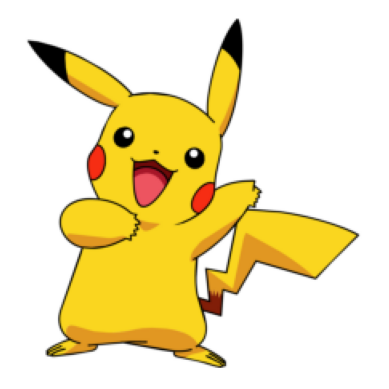

Shape of Rondoudou image: (231, 244, 3)


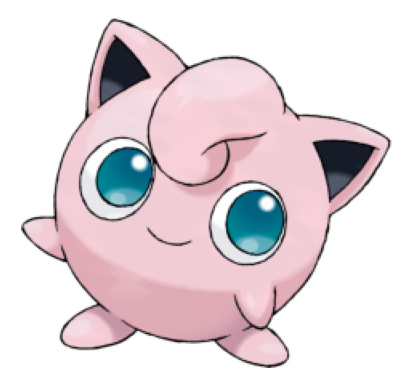

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model

%pylab inline

# Charger les images locales directement avec cv2.imread()
image_pikachu = cv2.imread('/content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/pikachu.png')
image_rondoudou = cv2.imread('/content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/rondoudou.png')

# Afficher l'image Pikachu
print(f'Shape of Pikachu image: {image_pikachu.shape}')
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB))
plt.show()

# Afficher l'image Rondoudou
print(f'Shape of Rondoudou image: {image_rondoudou.shape}')
plt.axis('off')
plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  

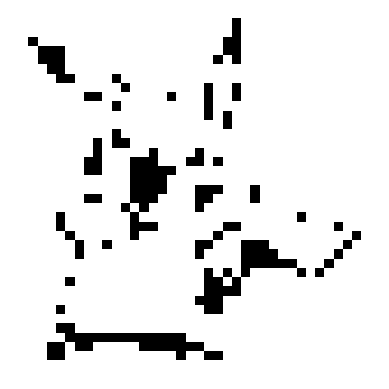

In [69]:
res = cv2.resize(image_pikachu , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Nouvelle section

Shape of the image (481, 640, 3)


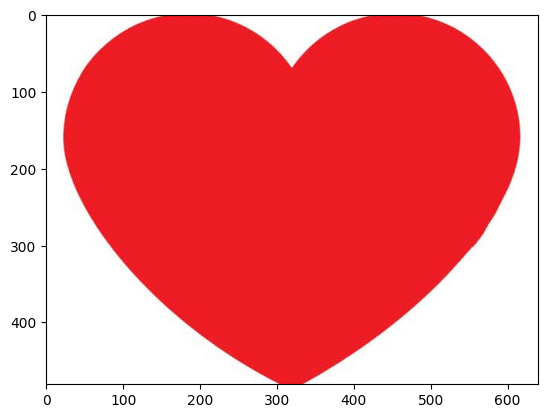

(20, 20, 3)
(20, 20)
255 255 255 255 000 000 000 000 255 255 255 255 000 000 000 000 255 255 255 255 
255 255 255 000 000 000 000 000 000 255 255 000 000 000 000 000 000 255 255 255 
255 255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 255 
255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 
255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 
255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 
255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 
255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 
255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 
255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 
255 255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 255 
255 255 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 255 
255 255

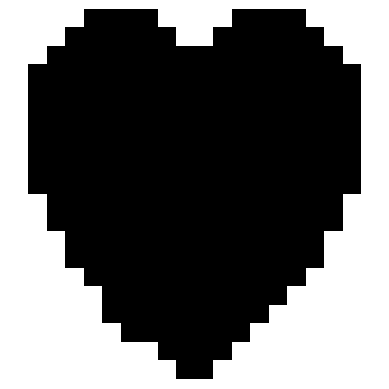

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image depuis le chemin local au lieu de l'URL
image_heart = cv2.imread('/content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/hearth.jpg')
print(f'Shape of the image {image_heart.shape}')
plt.imshow(cv2.cvtColor(image_heart, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

res_heart = cv2.resize(image_heart, dsize=(20,20), interpolation=cv2.INTER_CUBIC)
print(res_heart.shape)  # Corrigé de res.shape à res_heart.shape
res_heart = cv2.cvtColor(res_heart, cv2.COLOR_RGB2GRAY) # TO 3D to 1D
print(res_heart.shape)
res_heart = cv2.threshold(res_heart, 160, 255, cv2.THRESH_BINARY)[1]
d = res_heart
for row in range(0,20):
    for col in range(0,20):
        print("%03d " % d[row][col], end="")
    print("")

plt.imshow(res_heart, cmap='gray')  # Changé pour afficher en niveaux de gris
plt.axis('off')
plt.show()

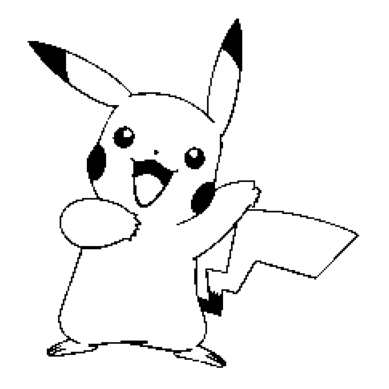

In [71]:
#Convert to bw
# Utilisez directement image_pikachu puisque vous l'avez déjà chargée depuis Drive
img_bw = cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2GRAY)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(img_bw, cmap='gray')  # Utilisez cmap='gray' pour les images binaires
plt.show()

[[0 0 0]
 [0 1 0]
 [0 0 0]]


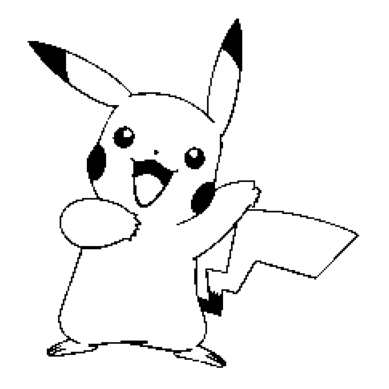

In [72]:
#defining an identity kernel, will change nothing because each pixel will remain with is value
kernel = np.matrix([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


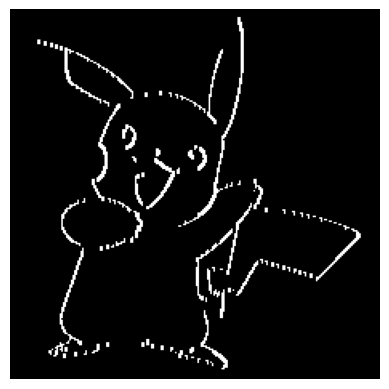

In [73]:
#defining a vertical edge detection kernel
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


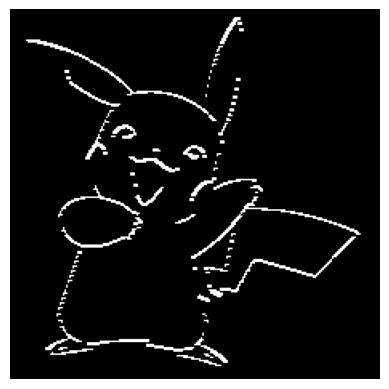

In [74]:
#defining an horizontal edge detection kernel
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [75]:
#Import dataset
import pathlib
import os
import tensorflow as tf
import zipfile

# Chemin vers votre fichier zip local
data_dir_zip = '/content/Image Classification with Python and TensorFlow/dataset.zip'

In [76]:

# Chemin correct vers votre fichier zip dans Google Drive
data_dir_zip = '/content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/dataset.zip'

# Vérifier que le fichier existe
if os.path.exists(data_dir_zip):
    print("✓ Fichier dataset.zip trouvé!")

    # Extraire le dataset depuis le fichier zip
    with zipfile.ZipFile(data_dir_zip, 'r') as zip_ref:
        zip_ref.extractall('/content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/dataset')

    # Définir le chemin vers le dataset extrait
    data_dir = pathlib.Path('/content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/dataset/dataset')
    print(f"✓ Dataset extrait dans: {data_dir}")

    # Vérifier le contenu du dataset
    print("\n📁 Contenu du dataset:")
    for item in data_dir.iterdir():
        if item.is_dir():
            num_images = len(list(item.glob('*.*')))
            print(f"  {item.name}: {num_images} images")
        else:
            print(f"  {item.name}")

else:
    print("✗ ERREUR: Le fichier dataset.zip n'existe pas à cet emplacement")
    print("Vérifiez le chemin: /content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/dataset.zip")

✓ Fichier dataset.zip trouvé!
✓ Dataset extrait dans: /content/drive/MyDrive/IA 2025/Image Classification with Python and TensorFlow/dataset/dataset

📁 Contenu du dataset:
  pikachu: 98 images
  rondoudou: 76 images
  .ipynb_checkpoints: 0 images
  pokemon: 819 images


In [84]:

image_count = len(list(data_dir.glob('*/*')))
print(image_count)

174


In [85]:
batch_size = 3
img_height = 200
img_width = 200

**batch_size = 3** : Définit la taille des "lots" (batches). Le modèle traitera 3 images à la fois pendant l'entraînement. **Note :** Une taille de 3 est très petite et est généralement utilisée pour tester du code. En pratique, on utilise des valeurs plus grandes (32, 64, 128...) pour une meilleure performance.

**img_height = 200** et **img_width = 200** : Définit la taille à laquelle toutes les images seront redimensionnées. C'est une étape cruciale car un modèle d'apprentissage automatique nécessite que toutes les images d'entrée aient exactement les mêmes dimensions.

In [86]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,               # Chemin vers le dossier principal contenant les images
  validation_split=0.2,   # Utilise 20% des données pour la validation
  subset="training",      # Spécifie qu'on veut le sous-ensemble "entraînement"
  seed=42,                # Graine aléatoire pour reproduire le même split
  image_size=(img_height, img_width), # Redimensionne les images
  batch_size=batch_size,  # Organise les images en lots de taille `batch_size`
)

Found 174 files belonging to 2 classes.
Using 140 files for training.


**validation_split=0.2 :** Indique que on a réservé 20% de toutes les images pour valider le modèle. Les 80% restants seront utilisés pour l'entraînement.

**subset="training" :** Dit à la fonction de ne prendre que la partie "entraînement" (les 80%) définie par validation_split.

**Résultat :** ***train_data*** est un objet Dataset de **TensorFlow** contenant 80% des images, prêtes à être utilisées pour entraîner un modèle.

In [87]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",                 # Ici, on demande le sous-ensemble "validation"
  seed=42,                             # Même graine que pour train_data ! C'est très important.
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 174 files belonging to 2 classes.
Using 34 files for validation.
['pikachu', 'rondoudou']


**val_data.class_names :** L'objet Dataset créé par image_dataset_from_directory contient automatiquement la liste des noms de classes, déduits des noms des sous-dossiers dans data_dir. **['pikachu', 'pokemon', 'rondoudou']**

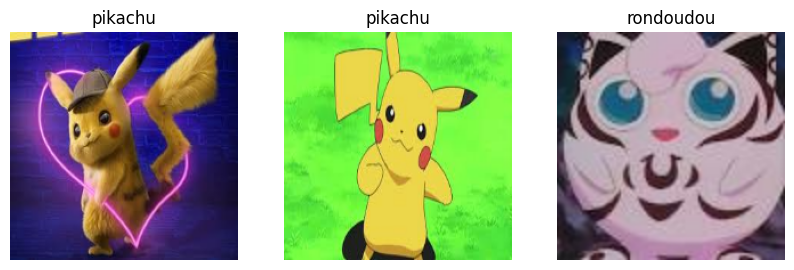

In [88]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [89]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Définir le modèle (identique à votre code)
num_classes = 2

model = tf.keras.Sequential([
    Rescaling(1./255),
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [90]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [91]:
# Entraînement du modèle (identique)
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=logdir,
    histogram_freq=1,
    write_images=True
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[tensorboard_callback]
)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.5005 - loss: 0.7200 - val_accuracy: 0.5000 - val_loss: 0.5756
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6884 - loss: 0.4668 - val_accuracy: 0.8529 - val_loss: 0.4597
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9558 - loss: 0.2997 - val_accuracy: 0.9412 - val_loss: 0.3784
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9490 - loss: 0.2004 - val_accuracy: 0.9706 - val_loss: 0.4017
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9758 - loss: 0.3148 - val_accuracy: 0.9412 - val_loss: 0.3863
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9581 - loss: 0.2461 - val_accuracy: 0.9412 - val_loss: 0.3544
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9655 - loss: 0.1675 - val_accuracy: 0.9118 - val_loss: 0.5091
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9857 - loss: 0.2261 - val_accuracy: 0.9412 -

Ordre des classes confirmé: ['pikachu', 'rondoudou']


Saving téléchargement (4).jpg to téléchargement (4) (1).jpg


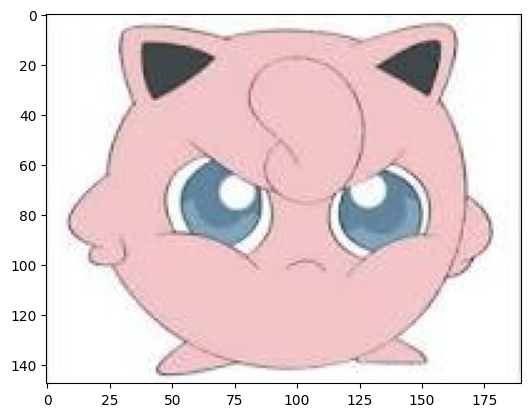

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Probabilités: [[0.23265164 0.76734835]]
Classe prédite: 1 -> rondoudou
IT'S A RONDOUDOU !


In [98]:
# PARTIE CRITIQUE: Vérification de l'ordre des classes
# Récupérer les noms de classes depuis les données d'entraînement
class_names = sorted(train_data.class_names)  # Tri alphabétique pour consistance
print("Ordre des classes confirmé:", class_names)

# Télécharger l'image à prédire
from google.colab import files
file_to_predict = files.upload()

for file_ in file_to_predict:
    # Charger et prétraiter l'image
    image_to_predict = cv2.imread(file_, cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()

    img_to_predict = np.expand_dims(cv2.resize(image_to_predict, (200, 200)), axis=0)

    # Prédiction
    predictions = model.predict(img_to_predict)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_idx]

    print("Probabilités:", predictions)
    print("Classe prédite:", predicted_class_idx, "->", predicted_class_name)

    # Utiliser l'ordre confirmé des classes pour l'affichage
    if predicted_class_name == "pikachu":
        print("IT'S A PIKACHU !")
    else:
        print("IT'S A RONDOUDOU !")